# Purpose of notebook
This notebook is explore the win/loss classification problem. The goal of this analysis is to identify what attributes are good at predicting match outcomes, in different senarios. 

Topics covered:
- data pre-processing
- decision tree model (baseline model?)
    - Overall round dataset
    - Data set broken up by attacker vs defender

## Additional background / hypothesis
* To win a match of valorant, you need to win 13 rounds (5 if swiftplay)
    - To win a round, how you win is dependent on if you are attacker or defender
        - If attacker, you win by either planting the spike and it detonates, or you eliminate all opponents
        - If defender, you win by either deativating a planted spike, eliminating all opponents, or just suriving without the spike being planted


* Hypothesis is depending on if you are attacker or defender, and if the spike has been planted or not, your strategy will change
    - More specifically, if you are attacker what will help you win will probably be elims, not dying, spike planting
    - If you are defender what will help you win is not dying, deacitivaitng spike
    - Depending on what is happning in the match (most obviously pre spike and post spike) the things you should focus on to win will change
    - Ideas: 
        - if you are an attacker and the spike is not planted, at least 2? or more of your teammates should focus on planting the spike (depending on your role!!)
        - if you are an attacker and the spike is planted, all teammates should focus on defending the spike and killing the other team
        - if you are a defender and the spike is not planted, the team should focus on kills
        - if you are a defender and the spike is planted, the team should focus on kills/deativating the spike
        - also just stay alive
    
### Questions:
-


In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

## Loading the data

In [2]:
import pandas as pd

# Read the CSV files into separate DataFrames
df1 = pd.read_csv('clean_data_norm_round_allf_dev_data.csv')
df2 = pd.read_csv('clean_data_norm_round_allf_pro1_data.csv')
df3 = pd.read_csv('clean_data_norm_round_allf_pro2_data.csv')

# Concatenate the DataFrames vertically
df = pd.concat([df1, df2, df3], ignore_index=True)

df

,user_id,map,player,ally4_character,self_character,ally1_character,ally2_character,ally3_character,opponent5_character,opponent6_character,...,self_avg_ammo_reserve,self_total_firing_time,self_longest_gun_secondary,self_max_loadout_value,spike_planted,spike_time,self_total_ability_usage_1,self_total_ability_usage_2,self_total_ability_usage_3,self_total_ability_usage_4
0,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,24.000000,2200,none,3434.0,False,0,0,1,1,0
1,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,19.400000,8600,classic,5100.0,False,125000,1,0,1,1
2,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,18.222222,9800,classic,5100.0,True,278800,1,1,1,0
3,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,16.800000,7400,classic,5100.0,False,304600,1,0,1,0
4,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,14.142857,4400,classic,6750.0,False,369400,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28635,3795,unknown,0,breach,jett,skye,sova,reyna,jett,gekko,...,20.500000,2200,ghost,5100.0,False,1500672,1,0,1,0
28636,3795,unknown,0,breach,jett,skye,sova,reyna,jett,gekko,...,13.500000,0,ghost,5100.0,False,1569284,1,0,1,0
28637,3795,unknown,0,breach,jett,skye,sova,reyna,jett,gekko,...,18.000000,0,ghost,5100.0,True,1695907,0,0,0,0
28638,3795,unknown,0,breach,jett,skye,sova,reyna,jett,gekko,...,20.833333,5601,none,4924.0,True,1811328,1,0,0,1


In [3]:
# Find rows with NaN values
nan_rows = df[df.isnull().any(axis=1)]

# Print the rows with NaN values
nan_rows

,user_id,map,player,ally4_character,self_character,ally1_character,ally2_character,ally3_character,opponent5_character,opponent6_character,...,self_avg_ammo_reserve,self_total_firing_time,self_longest_gun_secondary,self_max_loadout_value,spike_planted,spike_time,self_total_ability_usage_1,self_total_ability_usage_2,self_total_ability_usage_3,self_total_ability_usage_4


In [4]:
df.columns[:100]

Index(['user_id', 'map', 'player', 'ally4_character', 'self_character',
       'ally1_character', 'ally2_character', 'ally3_character',
       'opponent5_character', 'opponent6_character', 'opponent7_character',
       'opponent8_character', 'opponent9_character', 'round_number',
       'round_info_ally_side', 'round_info_round_end', 'round_info_round_won',
       'round_info_round_start', 'ally4_elims', 'ally4_deaths',
       'ally4_assists', 'ally4_headshots', 'ally4_wallbangs',
       'ally4_first_bloods', 'self_elims', 'self_deaths', 'self_assists',
       'self_headshots', 'self_wallbangs', 'self_first_bloods', 'ally1_elims',
       'ally1_deaths', 'ally1_assists', 'ally1_headshots', 'ally1_wallbangs',
       'ally1_first_bloods', 'ally2_elims', 'ally2_deaths', 'ally2_assists',
       'ally2_headshots', 'ally2_wallbangs', 'ally2_first_bloods',
       'ally3_elims', 'ally3_deaths', 'ally3_assists', 'ally3_headshots',
       'ally3_wallbangs', 'ally3_first_bloods', 'opponent0_elims'

In [5]:
df.columns[100:]

Index(['self_avg_ammo_reserve', 'self_total_firing_time',
       'self_longest_gun_secondary', 'self_max_loadout_value', 'spike_planted',
       'spike_time', 'self_total_ability_usage_1',
       'self_total_ability_usage_2', 'self_total_ability_usage_3',
       'self_total_ability_usage_4'],
      dtype='object')

In [6]:
df.iloc[0][:50]

user_id                       1006
map                          Pearl
player                           1
ally4_character            phoenix
self_character                jett
ally1_character              gekko
ally2_character             cypher
ally3_character              astra
opponent5_character         harbor
opponent6_character          astra
opponent7_character           jett
opponent8_character        phoenix
opponent9_character        killjoy
round_number                     7
round_info_ally_side      attacker
round_info_round_end        124802
round_info_round_won          True
round_info_round_start        4723
ally4_elims                    0.0
ally4_deaths                   0.0
ally4_assists                  0.0
ally4_headshots                0.0
ally4_wallbangs                0.0
ally4_first_bloods             0.0
self_elims                     0.0
self_deaths                    1.0
self_assists                   0.0
self_headshots                 0.0
self_wallbangs      

In [7]:
df.iloc[0][50:]

opponent0_assists                     0.0
opponent0_headshots                   0.0
opponent0_wallbangs                   0.0
opponent0_first_bloods                0.0
opponent1_elims                       1.0
opponent1_deaths                      0.0
opponent1_assists                     0.0
opponent1_headshots                   1.0
opponent1_wallbangs                   0.0
opponent1_first_bloods                0.0
opponent2_elims                       0.0
opponent2_deaths                      1.0
opponent2_assists                     0.0
opponent2_headshots                   0.0
opponent2_wallbangs                   0.0
opponent2_first_bloods                0.0
opponent3_elims                       0.0
opponent3_deaths                      0.0
opponent3_assists                     0.0
opponent3_headshots                   0.0
opponent3_wallbangs                   0.0
opponent3_first_bloods                0.0
opponent4_elims                       0.0
opponent4_deaths                  

## Data pre-processing
- Dropped 2 cols I don't need
- Checked to see if there are NaNs and 'unknowns'
- Because map wasn't really seeming to be a major influence on W/L ratio I am leaving the unknowns in
- However attacker vs defender could probably be an issue...


- Translated the boolean cols to 0 and 1
- One-hot encode categorical variables
- StandardScaler for numeric ...

In [8]:
df = df.drop(['player','round_number'], axis=1)

### encoding boolean features


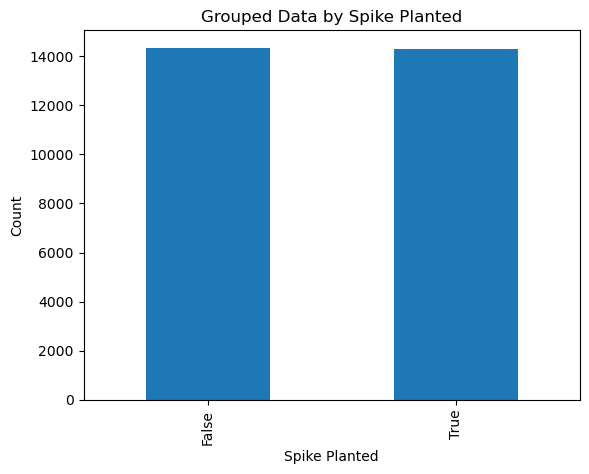

In [9]:
grouped_df = df.groupby('spike_planted').size()

grouped_df.plot(kind='bar')

plt.xlabel('Spike Planted')
plt.ylabel('Count')
plt.title('Grouped Data by Spike Planted')

plt.show()

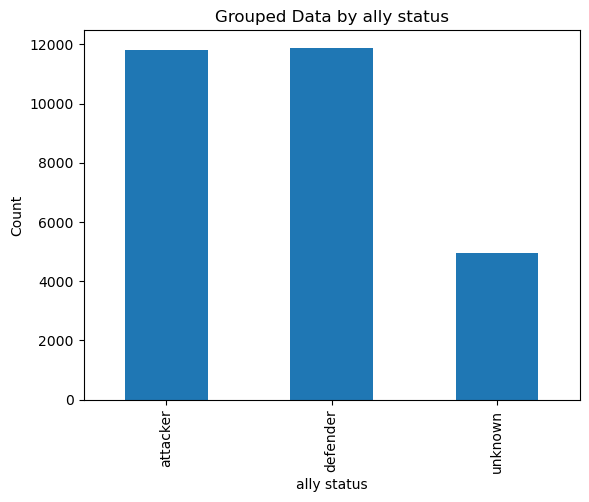

In [10]:
grouped_df = df.groupby('round_info_ally_side').size()

grouped_df.plot(kind='bar')

plt.xlabel('ally status')
plt.ylabel('Count')
plt.title('Grouped Data by ally status')

plt.show()

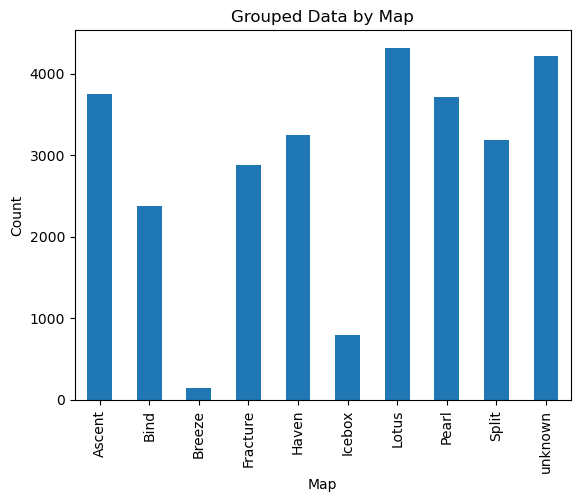

In [11]:
grouped_df = df.groupby('map').size()

grouped_df.plot(kind='bar')

plt.xlabel('Map')
plt.ylabel('Count')
plt.title('Grouped Data by Map')

plt.show()

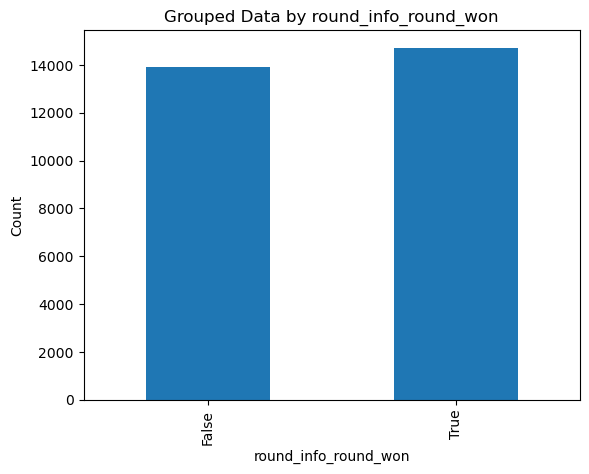

In [12]:
grouped_df = df.groupby('round_info_round_won').size()

grouped_df.plot(kind='bar')

plt.xlabel('round_info_round_won')
plt.ylabel('Count')
plt.title('Grouped Data by round_info_round_won')

plt.show()

In [13]:
mapping = {True: 1, False: 0}
df.loc[:, 'spike_planted'] = df['spike_planted'].map(mapping)
df

,user_id,map,ally4_character,self_character,ally1_character,ally2_character,ally3_character,opponent5_character,opponent6_character,opponent7_character,...,self_avg_ammo_reserve,self_total_firing_time,self_longest_gun_secondary,self_max_loadout_value,spike_planted,spike_time,self_total_ability_usage_1,self_total_ability_usage_2,self_total_ability_usage_3,self_total_ability_usage_4
0,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,24.000000,2200,none,3434.0,0,0,0,1,1,0
1,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,19.400000,8600,classic,5100.0,0,125000,1,0,1,1
2,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,18.222222,9800,classic,5100.0,1,278800,1,1,1,0
3,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,16.800000,7400,classic,5100.0,0,304600,1,0,1,0
4,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,14.142857,4400,classic,6750.0,0,369400,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28635,3795,unknown,breach,jett,skye,sova,reyna,jett,gekko,omen,...,20.500000,2200,ghost,5100.0,0,1500672,1,0,1,0
28636,3795,unknown,breach,jett,skye,sova,reyna,jett,gekko,omen,...,13.500000,0,ghost,5100.0,0,1569284,1,0,1,0
28637,3795,unknown,breach,jett,skye,sova,reyna,jett,gekko,omen,...,18.000000,0,ghost,5100.0,1,1695907,0,0,0,0
28638,3795,unknown,breach,jett,skye,sova,reyna,jett,gekko,omen,...,20.833333,5601,none,4924.0,1,1811328,1,0,0,1


In [14]:
mapping = {True: 1, False: 0}
df.loc[:, 'round_info_round_won'] = df['round_info_round_won'].map(mapping)
df

,user_id,map,ally4_character,self_character,ally1_character,ally2_character,ally3_character,opponent5_character,opponent6_character,opponent7_character,...,self_avg_ammo_reserve,self_total_firing_time,self_longest_gun_secondary,self_max_loadout_value,spike_planted,spike_time,self_total_ability_usage_1,self_total_ability_usage_2,self_total_ability_usage_3,self_total_ability_usage_4
0,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,24.000000,2200,none,3434.0,0,0,0,1,1,0
1,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,19.400000,8600,classic,5100.0,0,125000,1,0,1,1
2,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,18.222222,9800,classic,5100.0,1,278800,1,1,1,0
3,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,16.800000,7400,classic,5100.0,0,304600,1,0,1,0
4,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,14.142857,4400,classic,6750.0,0,369400,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28635,3795,unknown,breach,jett,skye,sova,reyna,jett,gekko,omen,...,20.500000,2200,ghost,5100.0,0,1500672,1,0,1,0
28636,3795,unknown,breach,jett,skye,sova,reyna,jett,gekko,omen,...,13.500000,0,ghost,5100.0,0,1569284,1,0,1,0
28637,3795,unknown,breach,jett,skye,sova,reyna,jett,gekko,omen,...,18.000000,0,ghost,5100.0,1,1695907,0,0,0,0
28638,3795,unknown,breach,jett,skye,sova,reyna,jett,gekko,omen,...,20.833333,5601,none,4924.0,1,1811328,1,0,0,1


In [15]:
# Find rows with NaN values
nan_rows = df[df.isnull().any(axis=1)]

# Print the rows with NaN values
nan_rows

,user_id,map,ally4_character,self_character,ally1_character,ally2_character,ally3_character,opponent5_character,opponent6_character,opponent7_character,...,self_avg_ammo_reserve,self_total_firing_time,self_longest_gun_secondary,self_max_loadout_value,spike_planted,spike_time,self_total_ability_usage_1,self_total_ability_usage_2,self_total_ability_usage_3,self_total_ability_usage_4


### one-hot encoding 

In [16]:
df_encoded = pd.get_dummies(df, columns=['map', 'ally4_character', 'self_character', 
                                            'ally1_character', 'ally2_character', 'ally3_character', 
                                            'opponent5_character', 'opponent6_character', 'opponent7_character',
                                            'opponent8_character', 'opponent9_character',
                                               'round_info_ally_side','self_longest_inv_state', 
                                               'self_longest_gun_primary','self_longest_gun_secondary'])


In [17]:
df_encoded

,user_id,round_info_round_end,round_info_round_won,round_info_round_start,ally4_elims,ally4_deaths,ally4_assists,ally4_headshots,ally4_wallbangs,ally4_first_bloods,...,self_longest_gun_primary_phantom,self_longest_gun_primary_spectre,self_longest_gun_primary_stinger,self_longest_gun_primary_vandal,self_longest_gun_secondary_classic,self_longest_gun_secondary_frenzy,self_longest_gun_secondary_ghost,self_longest_gun_secondary_none,self_longest_gun_secondary_sheriff,self_longest_gun_secondary_shorty
0,1006,124802,1,4723,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
1,1006,204402,1,154802,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2,1006,304570,1,234402,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
3,1006,369242,1,334570,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,1006,448998,1,399242,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28635,3795,1569092,1,1530671,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0
28636,3795,1632898,1,1599092,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
28637,3795,1732124,0,1662898,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
28638,3795,1834542,1,1762124,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0


## round length

In [18]:
df_encoded['round_info_round_length'] = df_encoded['round_info_round_end'] - df_encoded['round_info_round_start']

In [19]:
df_encoded.iloc[0][:50]

user_id                     1006.0
round_info_round_end      124802.0
round_info_round_won           1.0
round_info_round_start      4723.0
ally4_elims                    0.0
ally4_deaths                   0.0
ally4_assists                  0.0
ally4_headshots                0.0
ally4_wallbangs                0.0
ally4_first_bloods             0.0
self_elims                     0.0
self_deaths                    1.0
self_assists                   0.0
self_headshots                 0.0
self_wallbangs                 0.0
self_first_bloods              0.0
ally1_elims                    0.0
ally1_deaths                   0.0
ally1_assists                  0.0
ally1_headshots                0.0
ally1_wallbangs                0.0
ally1_first_bloods             0.0
ally2_elims                    1.0
ally2_deaths                   0.0
ally2_assists                  0.0
ally2_headshots                1.0
ally2_wallbangs                0.0
ally2_first_bloods             0.0
ally3_elims         

In [20]:
df_encoded.iloc[2][50:100]

opponent2_wallbangs                0.000000
opponent2_first_bloods             0.000000
opponent3_elims                    3.000000
opponent3_deaths                   1.000000
opponent3_assists                  0.000000
opponent3_headshots                2.000000
opponent3_wallbangs                0.000000
opponent3_first_bloods             0.000000
opponent4_elims                    0.000000
opponent4_deaths                   0.000000
opponent4_assists                  0.000000
opponent4_headshots                0.000000
opponent4_wallbangs                0.000000
opponent4_first_bloods             0.000000
ally4_avg_health                  18.500000
self_avg_health                  100.000000
ally1_avg_health                  92.647059
ally2_avg_health                  72.125000
ally3_avg_health                  94.875000
self_avg_shield                   50.000000
self_avg_credits                6325.000000
self_avg_ammo_mag                 18.222222
ally4_ultimate_usage            

In [21]:
df_encoded.iloc[0][100:150]

map_Pearl                    1.0
map_Split                    0.0
map_unknown                  0.0
ally4_character_astra        0.0
ally4_character_breach       0.0
ally4_character_brimstone    0.0
ally4_character_chamber      0.0
ally4_character_cypher       0.0
ally4_character_fade         0.0
ally4_character_gekko        0.0
ally4_character_harbor       0.0
ally4_character_jett         0.0
ally4_character_kay/o        0.0
ally4_character_killjoy      0.0
ally4_character_neon         0.0
ally4_character_omen         0.0
ally4_character_phoenix      1.0
ally4_character_raze         0.0
ally4_character_reyna        0.0
ally4_character_sage         0.0
ally4_character_skye         0.0
ally4_character_sova         0.0
ally4_character_viper        0.0
ally4_character_yoru         0.0
self_character_astra         0.0
self_character_breach        0.0
self_character_brimstone     0.0
self_character_chamber       0.0
self_character_cypher        0.0
self_character_fade          0.0
self_chara

In [22]:
df_encoded.iloc[0][150:200]

ally1_character_fade         0.0
ally1_character_gekko        1.0
ally1_character_harbor       0.0
ally1_character_jett         0.0
ally1_character_kay/o        0.0
ally1_character_killjoy      0.0
ally1_character_neon         0.0
ally1_character_omen         0.0
ally1_character_phoenix      0.0
ally1_character_raze         0.0
ally1_character_reyna        0.0
ally1_character_sage         0.0
ally1_character_skye         0.0
ally1_character_sova         0.0
ally1_character_viper        0.0
ally1_character_yoru         0.0
ally2_character_astra        0.0
ally2_character_breach       0.0
ally2_character_brimstone    0.0
ally2_character_chamber      0.0
ally2_character_cypher       1.0
ally2_character_fade         0.0
ally2_character_gekko        0.0
ally2_character_harbor       0.0
ally2_character_jett         0.0
ally2_character_kay/o        0.0
ally2_character_killjoy      0.0
ally2_character_neon         0.0
ally2_character_omen         0.0
ally2_character_phoenix      0.0
ally2_char

In [23]:
df_encoded.iloc[0][200:250]

ally3_character_phoenix          0.0
ally3_character_raze             0.0
ally3_character_reyna            0.0
ally3_character_sage             0.0
ally3_character_skye             0.0
ally3_character_sova             0.0
ally3_character_viper            0.0
ally3_character_yoru             0.0
opponent5_character_astra        0.0
opponent5_character_breach       0.0
opponent5_character_brimstone    0.0
opponent5_character_chamber      0.0
opponent5_character_cypher       0.0
opponent5_character_fade         0.0
opponent5_character_gekko        0.0
opponent5_character_harbor       1.0
opponent5_character_jett         0.0
opponent5_character_kay/o        0.0
opponent5_character_killjoy      0.0
opponent5_character_neon         0.0
opponent5_character_omen         0.0
opponent5_character_phoenix      0.0
opponent5_character_raze         0.0
opponent5_character_reyna        0.0
opponent5_character_sage         0.0
opponent5_character_skye         0.0
opponent5_character_sova         0.0
o

In [24]:
df_encoded.iloc[0][250:300]

opponent7_character_astra        0.0
opponent7_character_breach       0.0
opponent7_character_brimstone    0.0
opponent7_character_chamber      0.0
opponent7_character_cypher       0.0
opponent7_character_fade         0.0
opponent7_character_gekko        0.0
opponent7_character_harbor       0.0
opponent7_character_jett         1.0
opponent7_character_kay/o        0.0
opponent7_character_killjoy      0.0
opponent7_character_neon         0.0
opponent7_character_omen         0.0
opponent7_character_phoenix      0.0
opponent7_character_raze         0.0
opponent7_character_reyna        0.0
opponent7_character_sage         0.0
opponent7_character_skye         0.0
opponent7_character_sova         0.0
opponent7_character_viper        0.0
opponent7_character_yoru         0.0
opponent8_character_astra        0.0
opponent8_character_breach       0.0
opponent8_character_brimstone    0.0
opponent8_character_chamber      0.0
opponent8_character_cypher       0.0
opponent8_character_fade         0.0
o

In [25]:
df_encoded.iloc[0][300:]

opponent9_character_jett                   0.0
opponent9_character_kay/o                  0.0
opponent9_character_killjoy                1.0
opponent9_character_neon                   0.0
opponent9_character_omen                   0.0
opponent9_character_phoenix                0.0
opponent9_character_raze                   0.0
opponent9_character_reyna                  0.0
opponent9_character_sage                   0.0
opponent9_character_skye                   0.0
opponent9_character_sova                   0.0
opponent9_character_viper                  0.0
opponent9_character_yoru                   0.0
round_info_ally_side_attacker              1.0
round_info_ally_side_defender              0.0
round_info_ally_side_unknown               0.0
self_longest_inv_state_melee               1.0
self_longest_inv_state_none                0.0
self_longest_inv_state_primary             0.0
self_longest_inv_state_secondary           0.0
self_longest_gun_primary_ares              0.0
self_longest_

In [26]:
# Find rows with NaN values
nan_rows = df_encoded[df_encoded.isnull().any(axis=1)]

# Print the rows with NaN values
nan_rows

,user_id,round_info_round_end,round_info_round_won,round_info_round_start,ally4_elims,ally4_deaths,ally4_assists,ally4_headshots,ally4_wallbangs,ally4_first_bloods,...,self_longest_gun_primary_spectre,self_longest_gun_primary_stinger,self_longest_gun_primary_vandal,self_longest_gun_secondary_classic,self_longest_gun_secondary_frenzy,self_longest_gun_secondary_ghost,self_longest_gun_secondary_none,self_longest_gun_secondary_sheriff,self_longest_gun_secondary_shorty,round_info_round_length


### Downsampling
- solving the class imbalance, may be a better way than this

In [27]:
# downsampling for now
class_win = df_encoded[df_encoded['round_info_round_won'] == 1]
class_loss = df_encoded[df_encoded['round_info_round_won'] == 0]

num_samples_class_win = len(class_win)
num_samples_class_loss = len(class_loss)

downsampled_class_win = class_win.sample(n=num_samples_class_loss, random_state=42)
downsampled_class_loss = class_loss

# Combine the downsampled classes into a new data frame
downsampled_df = pd.concat([downsampled_class_win, downsampled_class_loss])

downsampled_df = downsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)
downsampled_df

,user_id,round_info_round_end,round_info_round_won,round_info_round_start,ally4_elims,ally4_deaths,ally4_assists,ally4_headshots,ally4_wallbangs,ally4_first_bloods,...,self_longest_gun_primary_spectre,self_longest_gun_primary_stinger,self_longest_gun_primary_vandal,self_longest_gun_secondary_classic,self_longest_gun_secondary_frenzy,self_longest_gun_secondary_ghost,self_longest_gun_secondary_none,self_longest_gun_secondary_sheriff,self_longest_gun_secondary_shorty,round_info_round_length
0,69,169029,0,127194,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,41835
1,65,1399018,1,1357408,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,41610
2,63,1647064,0,1611891,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,35173
3,71,1724602,1,1659100,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,65502
4,74,1502801,1,1471811,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,30990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27839,63,2226164,0,2128770,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,97394
27840,3804,1900614,1,1841602,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,59012
27841,69,410603,1,355602,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,55001
27842,997,711200,0,645601,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,65599


In [28]:
downsampled_df.to_csv('balanced_onehot.csv', index=False)

## Decision Tree Classifier

### All data

In [29]:
# train test split
X = downsampled_df.drop('round_info_round_won', axis=1)
y = downsampled_df['round_info_round_won']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Create a DecisionTreeClassifier object
dtc = DecisionTreeClassifier(random_state=1)

# Train the model using the training sets
dtc.fit(X_train_scaled, y_train)

# Predict the response for test dataset
y_pred = dtc.predict(X_test_scaled)


y_pred_train = dtc.predict(X_train_scaled)
# Model Accuracy
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train))

# Classification Report
print(classification_report(y_test, y_pred))

# Model Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

Train Accuracy: 1.0
[[11206     0]
 [    0 11069]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2716
           1       0.94      0.94      0.94      2853

    accuracy                           0.94      5569
   macro avg       0.94      0.94      0.94      5569
weighted avg       0.94      0.94      0.94      5569

Test Accuracy: 0.9389477464535824
[[2549  167]
 [ 173 2680]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2716
           1       0.94      0.94      0.94      2853

    accuracy                           0.94      5569
   macro avg       0.94      0.94      0.94      5569
weighted avg       0.94      0.94      0.94      5569



In [31]:
feature_importances = pd.DataFrame(dtc.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)


In [32]:
feature_importances[:50]

,importance
self_deaths,0.290048
ally1_deaths,0.128782
ally4_deaths,0.062055
opponent0_deaths,0.059486
opponent1_deaths,0.055189
self_avg_health,0.053299
ally2_deaths,0.040181
opponent4_deaths,0.031365
opponent2_deaths,0.025491
ally2_elims,0.024368


In [33]:
threshold = 0.01

unimportant_features = feature_importances[feature_importances['importance'] < threshold].index

In [34]:
unimportant_features

Index(['round_info_round_end', 'ally1_avg_health', 'ally3_avg_health',
       'self_avg_shield', 'self_avg_ammo_mag', 'spike_time', 'ally4_elims',
       'round_info_round_start', 'self_total_firing_time', 'self_avg_credits',
       ...
       'opponent7_character_sage', 'ally3_character_viper',
       'opponent5_character_astra', 'opponent5_character_chamber',
       'opponent5_character_cypher', 'self_character_breach',
       'self_character_fade', 'opponent7_character_jett',
       'self_character_harbor', 'ally2_character_sova'],
      dtype='object', length=325)

In [35]:
X_train_reduced = X_train.drop(unimportant_features, axis=1)
X_test_reduced = X_test.drop(unimportant_features, axis=1)

In [36]:
threshold = 0.01

important_features = feature_importances[feature_importances['importance'] > threshold].index

In [37]:
important_features

Index(['self_deaths', 'ally1_deaths', 'ally4_deaths', 'opponent0_deaths',
       'opponent1_deaths', 'self_avg_health', 'ally2_deaths',
       'opponent4_deaths', 'opponent2_deaths', 'ally2_elims', 'ally3_deaths',
       'ally3_elims', 'opponent3_deaths', 'round_info_round_length'],
      dtype='object')

In [38]:
# Train the model using the training sets
dtc.fit(X_train_reduced, y_train)

# Predict the response for test dataset
y_pred = dtc.predict(X_test_reduced)


y_pred_train = dtc.predict(X_train_reduced)

# Model Accuracy
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train))

# Classification Report
print(classification_report(y_test, y_pred))

# Model Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

Train Accuracy: 1.0
[[11206     0]
 [    0 11069]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2716
           1       0.95      0.95      0.95      2853

    accuracy                           0.95      5569
   macro avg       0.95      0.95      0.95      5569
weighted avg       0.95      0.95      0.95      5569

Test Accuracy: 0.949901239001616
[[2579  137]
 [ 142 2711]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2716
           1       0.95      0.95      0.95      2853

    accuracy                           0.95      5569
   macro avg       0.95      0.95      0.95      5569
weighted avg       0.95      0.95      0.95      5569



In [39]:
feature_importances = pd.DataFrame(dtc.feature_importances_,
                                   index = X_train_reduced.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
self_deaths,0.292928
ally1_deaths,0.132278
self_avg_health,0.078032
round_info_round_length,0.077378
ally4_deaths,0.069674
opponent0_deaths,0.063490
opponent1_deaths,0.059705
ally2_deaths,0.045105
opponent4_deaths,0.037354
ally2_elims,0.034630


In [40]:
def d_tree(X_train,y_train,X_test,y_test):
    dtc = DecisionTreeClassifier(random_state=1)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    y_pred_train = dtc.predict(X_train)
    print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
    print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_test, y_pred))

    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    return dtc

In [41]:
def f_importance(dtc):
    feature_importances = pd.DataFrame(dtc.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
    return feature_importances
    

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def d_tree_tuning(X_train, y_train, X_test, y_test):
    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'max_depth': [10, 20, 30],  # Example values for max_depth
        'min_samples_leaf': [1, 2, 3],  # Example values for min_samples_leaf
        'min_samples_split': [2, 5, 10]  # Example values for min_samples_split
    }

    # Create a decision tree classifier
    dtc = DecisionTreeClassifier(random_state=1)

    # Create a GridSearchCV object with the decision tree classifier and parameter grid
    grid_search = GridSearchCV(dtc, param_grid, cv=5)  # Adjust cv value as needed

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Retrieve the best hyperparameters and create a decision tree with those settings
    best_dtc = grid_search.best_estimator_

    # Predict on the training set using the best model
    y_pred_train = best_dtc.predict(X_train)

    # Predict on the test set using the best model
    y_pred = best_dtc.predict(X_test)

    # Print evaluation metrics for the training set
    print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
    print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_train, y_pred_train))

    # Print evaluation metrics for the test set
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    return best_dtc

In [43]:
best_dtc = d_tree_tuning(X_train, y_train, X_test, y_test)

Train Accuracy: 0.9784062850729517
[[11006   200]
 [  281 10788]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11206
           1       0.98      0.97      0.98     11069

    accuracy                           0.98     22275
   macro avg       0.98      0.98      0.98     22275
weighted avg       0.98      0.98      0.98     22275

Test Accuracy: 0.9445142754534027
[[2585  131]
 [ 178 2675]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2716
           1       0.95      0.94      0.95      2853

    accuracy                           0.94      5569
   macro avg       0.94      0.94      0.94      5569
weighted avg       0.94      0.94      0.94      5569



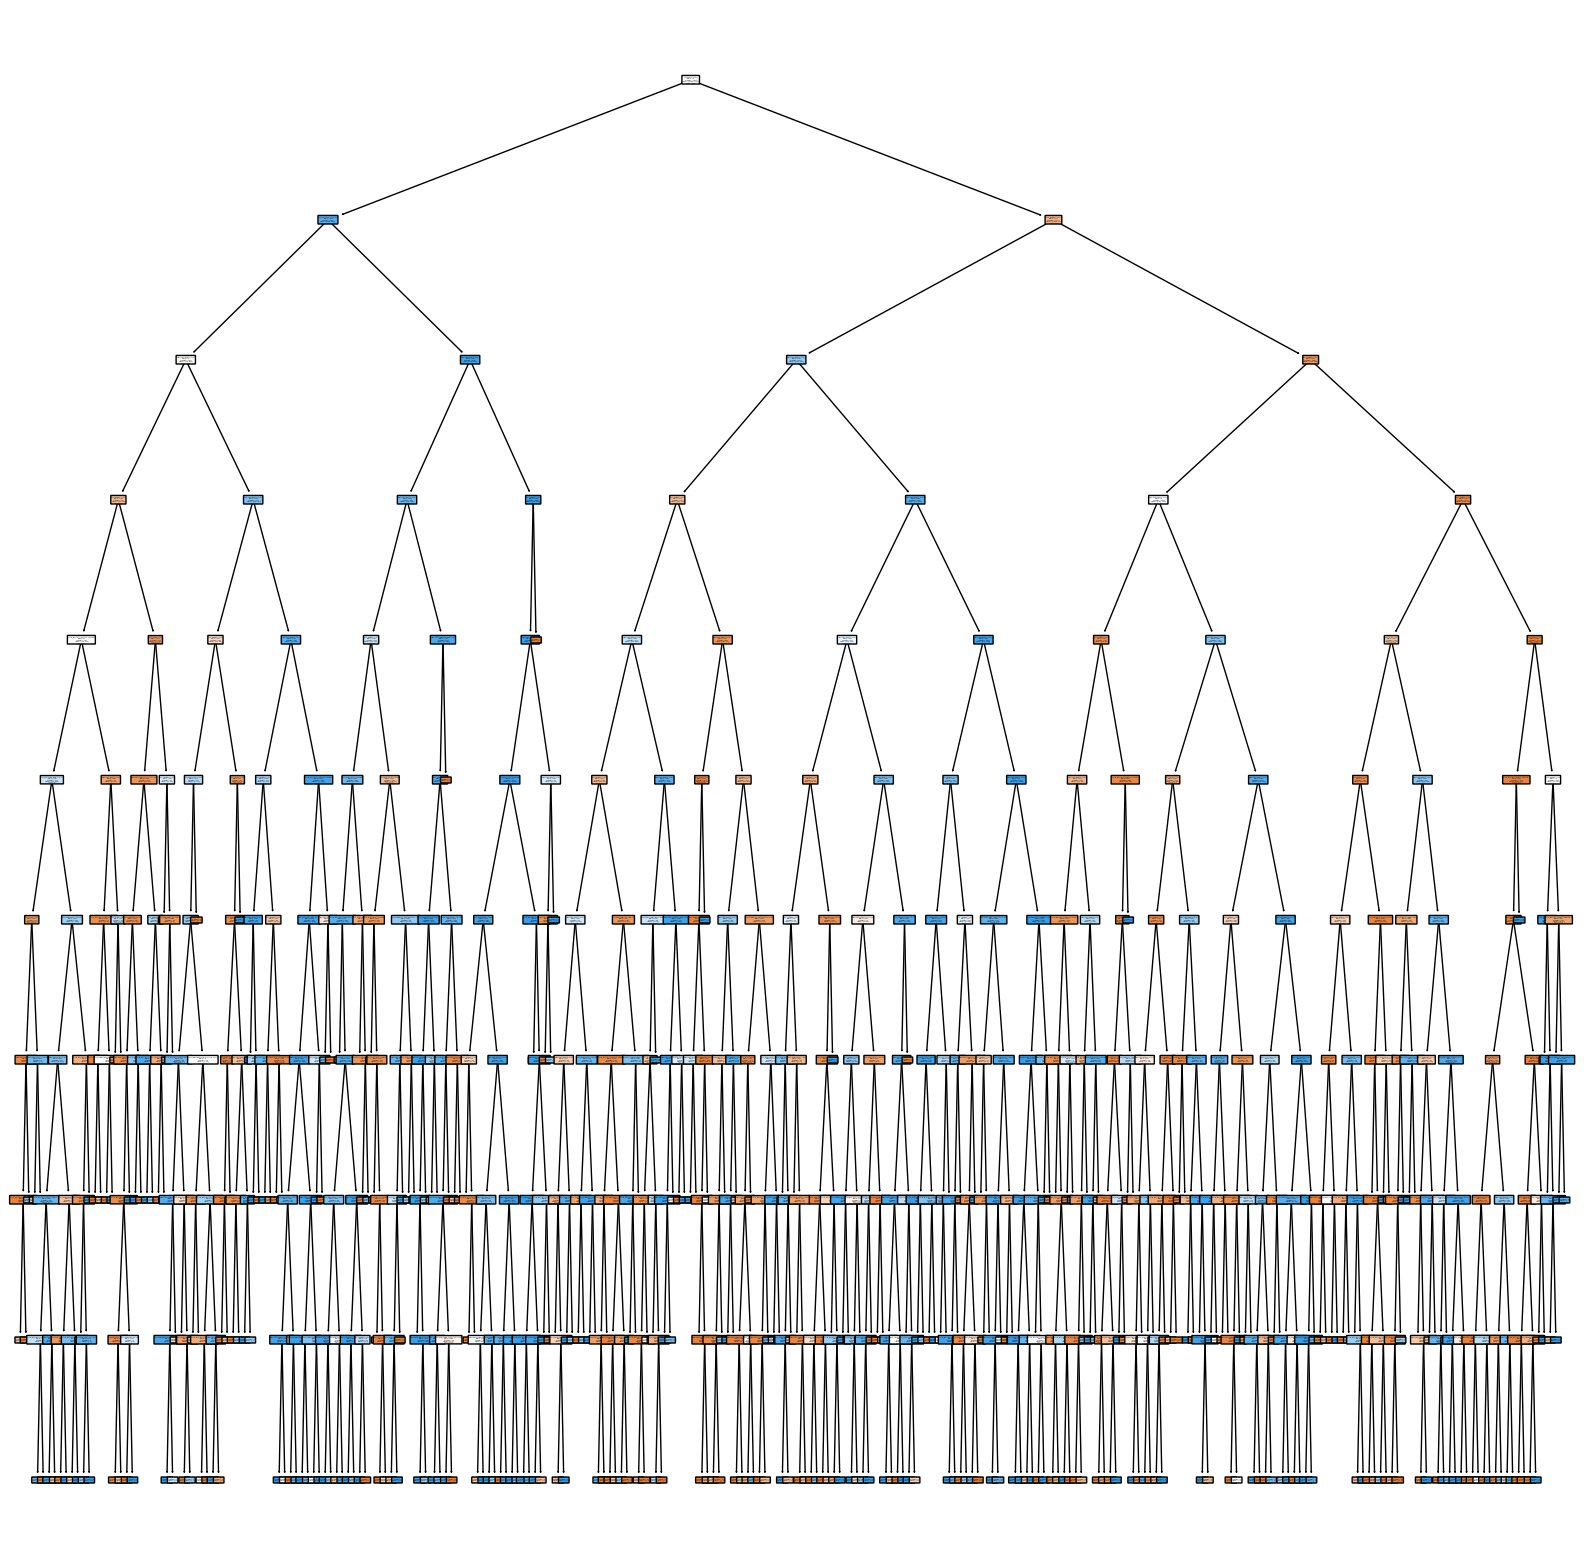

In [46]:
fig, ax = plt.subplots(figsize=(20, 20)) 
tree.plot_tree(best_dtc, 
               feature_names=X_train.columns, 
               class_names=['Loss', 'Win'], 
               filled=True,
               rounded=True,
               ax=ax)

plt.show()

In [48]:
def d_tree_s(X_train,y_train,X_test,y_test):
    dtc = DecisionTreeClassifier(max_depth = 3, random_state=1)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    y_pred_train = dtc.predict(X_train)
    print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
    print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_test, y_pred))

    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    return dtc

In [49]:
small_dtc = d_tree_s(X_train,y_train,X_test,y_test)

Train Accuracy: 0.8510886644219977
[[9367 1839]
 [1478 9591]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      2716
           1       0.85      0.88      0.87      2853

    accuracy                           0.86      5569
   macro avg       0.86      0.86      0.86      5569
weighted avg       0.86      0.86      0.86      5569

Test Accuracy: 0.8610163404560962
[[2285  431]
 [ 343 2510]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      2716
           1       0.85      0.88      0.87      2853

    accuracy                           0.86      5569
   macro avg       0.86      0.86      0.86      5569
weighted avg       0.86      0.86      0.86      5569



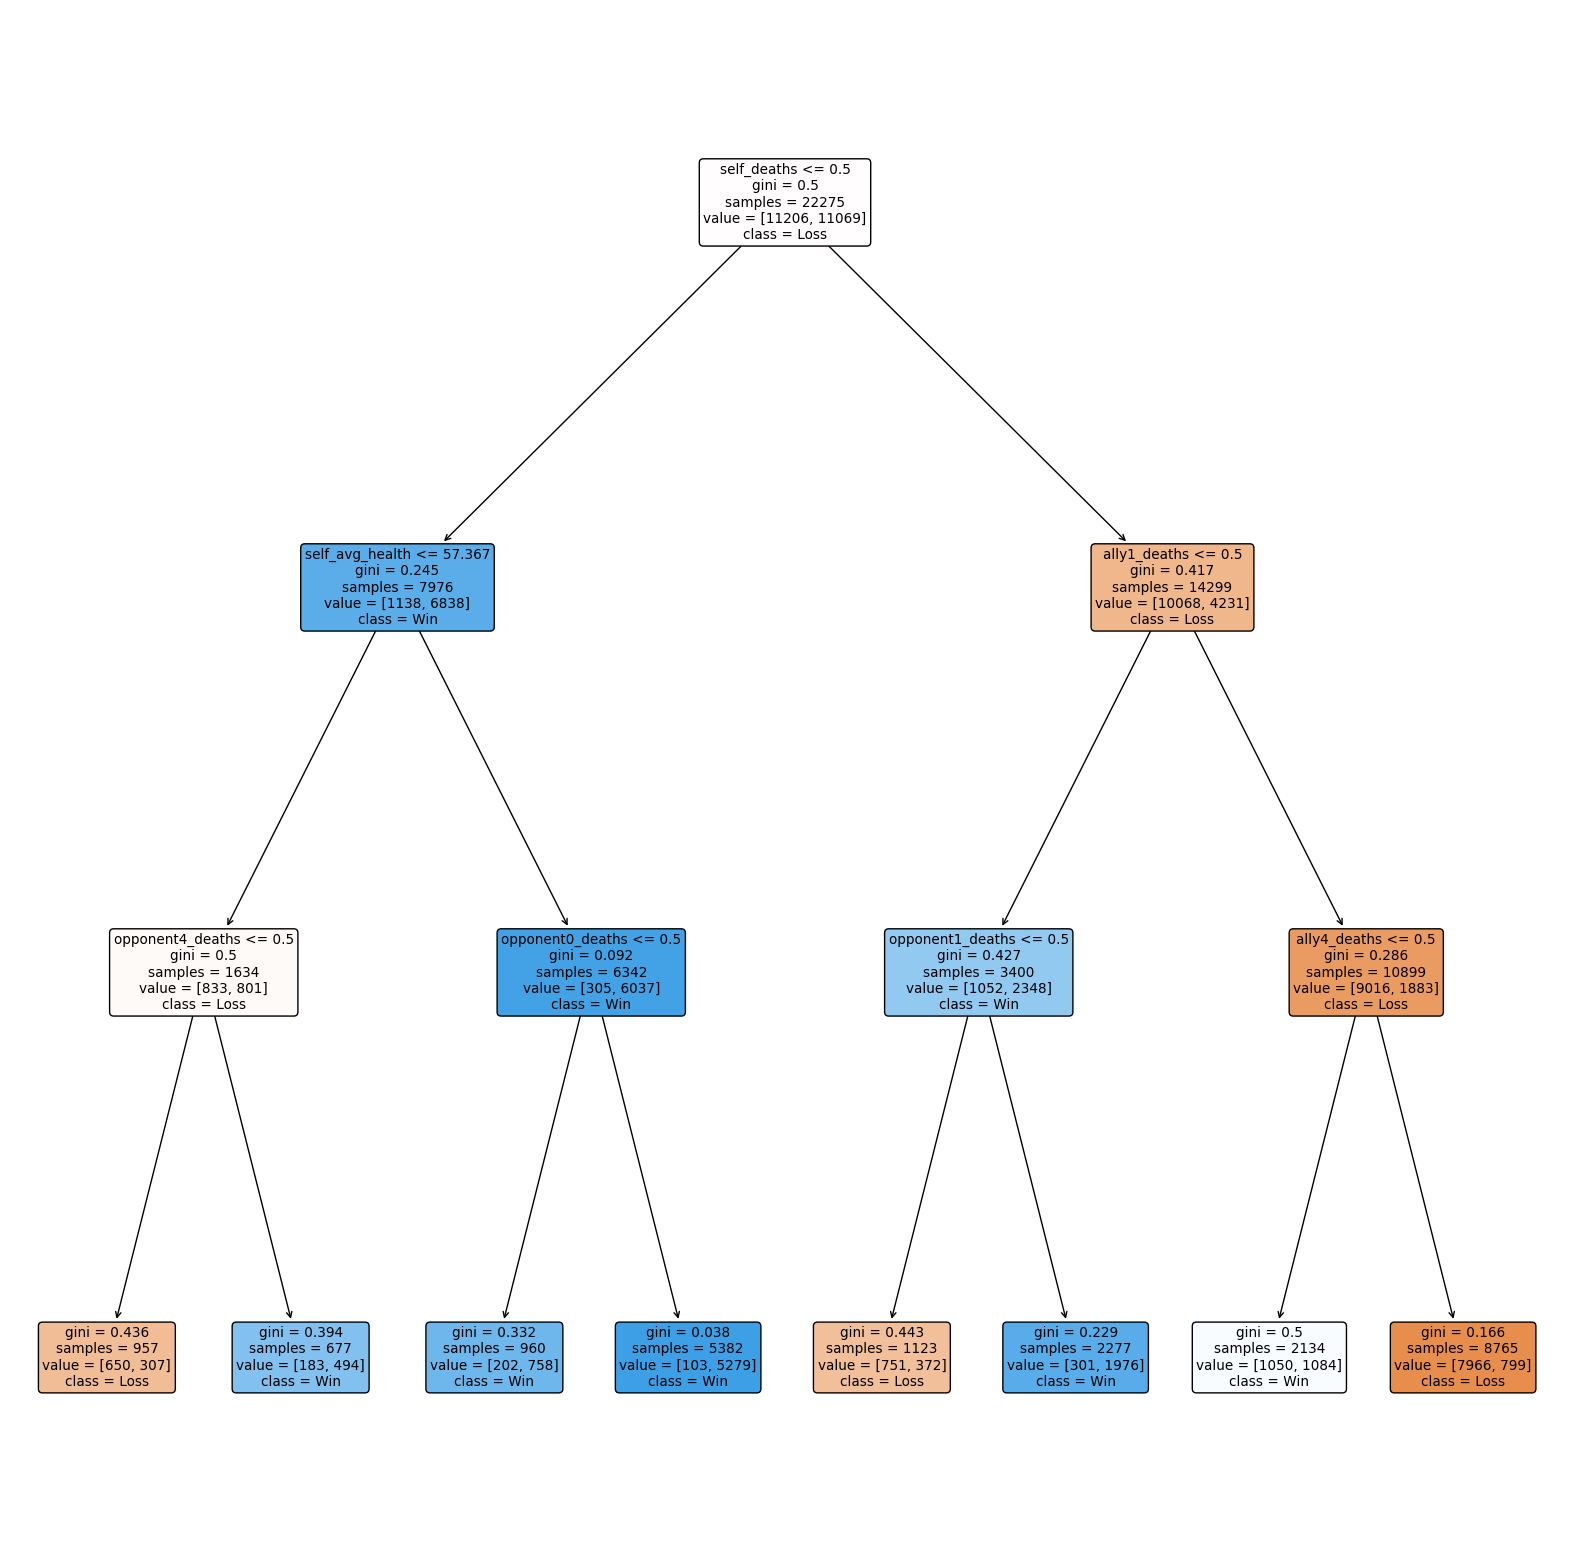

In [50]:
fig, ax = plt.subplots(figsize=(20, 20)) 
tree.plot_tree(small_dtc, 
               feature_names=X_train.columns, 
               class_names=['Loss', 'Win'], 
               filled=True,
               rounded=True,
               ax=ax)

plt.show()

In [45]:
feature_importances

,importance
self_deaths,0.292928
ally1_deaths,0.132278
self_avg_health,0.078032
round_info_round_length,0.077378
ally4_deaths,0.069674
opponent0_deaths,0.063490
opponent1_deaths,0.059705
ally2_deaths,0.045105
opponent4_deaths,0.037354
ally2_elims,0.034630


In [41]:
unimportant_features

Index(['self_avg_health', 'round_info_round_length', 'ally4_deaths',
       'opponent0_deaths', 'opponent1_deaths', 'ally2_deaths',
       'opponent4_deaths', 'ally2_elims', 'opponent2_deaths', 'ally3_deaths',
       'ally3_elims', 'opponent3_deaths'],
      dtype='object')

In [42]:
X_train_reduced = X_train.drop(unimportant_features, axis=1)
X_test_reduced = X_test.drop(unimportant_features, axis=1)

In [43]:
# Train the model using the training sets
dtc.fit(X_train_reduced, y_train)

# Predict the response for test dataset
y_pred = dtc.predict(X_test_reduced)


y_pred_train = dtc.predict(X_train_reduced)

# Model Accuracy
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train))

# Classification Report
print(classification_report(y_test, y_pred))

# Model Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

Train Accuracy: 1.0
[[11206     0]
 [    0 11069]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2716
           1       0.89      0.89      0.89      2853

    accuracy                           0.89      5569
   macro avg       0.89      0.89      0.89      5569
weighted avg       0.89      0.89      0.89      5569

Test Accuracy: 0.8892081163584127
[[2416  300]
 [ 317 2536]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2716
           1       0.89      0.89      0.89      2853

    accuracy                           0.89      5569
   macro avg       0.89      0.89      0.89      5569
weighted avg       0.89      0.89      0.89      5569



In [46]:
feature_names=X_test_reduced.columns
feature_names

Index(['user_id', 'round_info_round_end', 'round_info_round_start',
       'ally4_elims', 'ally4_assists', 'ally4_headshots', 'ally4_wallbangs',
       'ally4_first_bloods', 'self_elims', 'self_deaths',
       ...
       'self_longest_gun_primary_phantom', 'self_longest_gun_primary_spectre',
       'self_longest_gun_primary_stinger', 'self_longest_gun_primary_vandal',
       'self_longest_gun_secondary_classic',
       'self_longest_gun_secondary_frenzy', 'self_longest_gun_secondary_ghost',
       'self_longest_gun_secondary_none', 'self_longest_gun_secondary_sheriff',
       'self_longest_gun_secondary_shorty'],
      dtype='object', length=327)

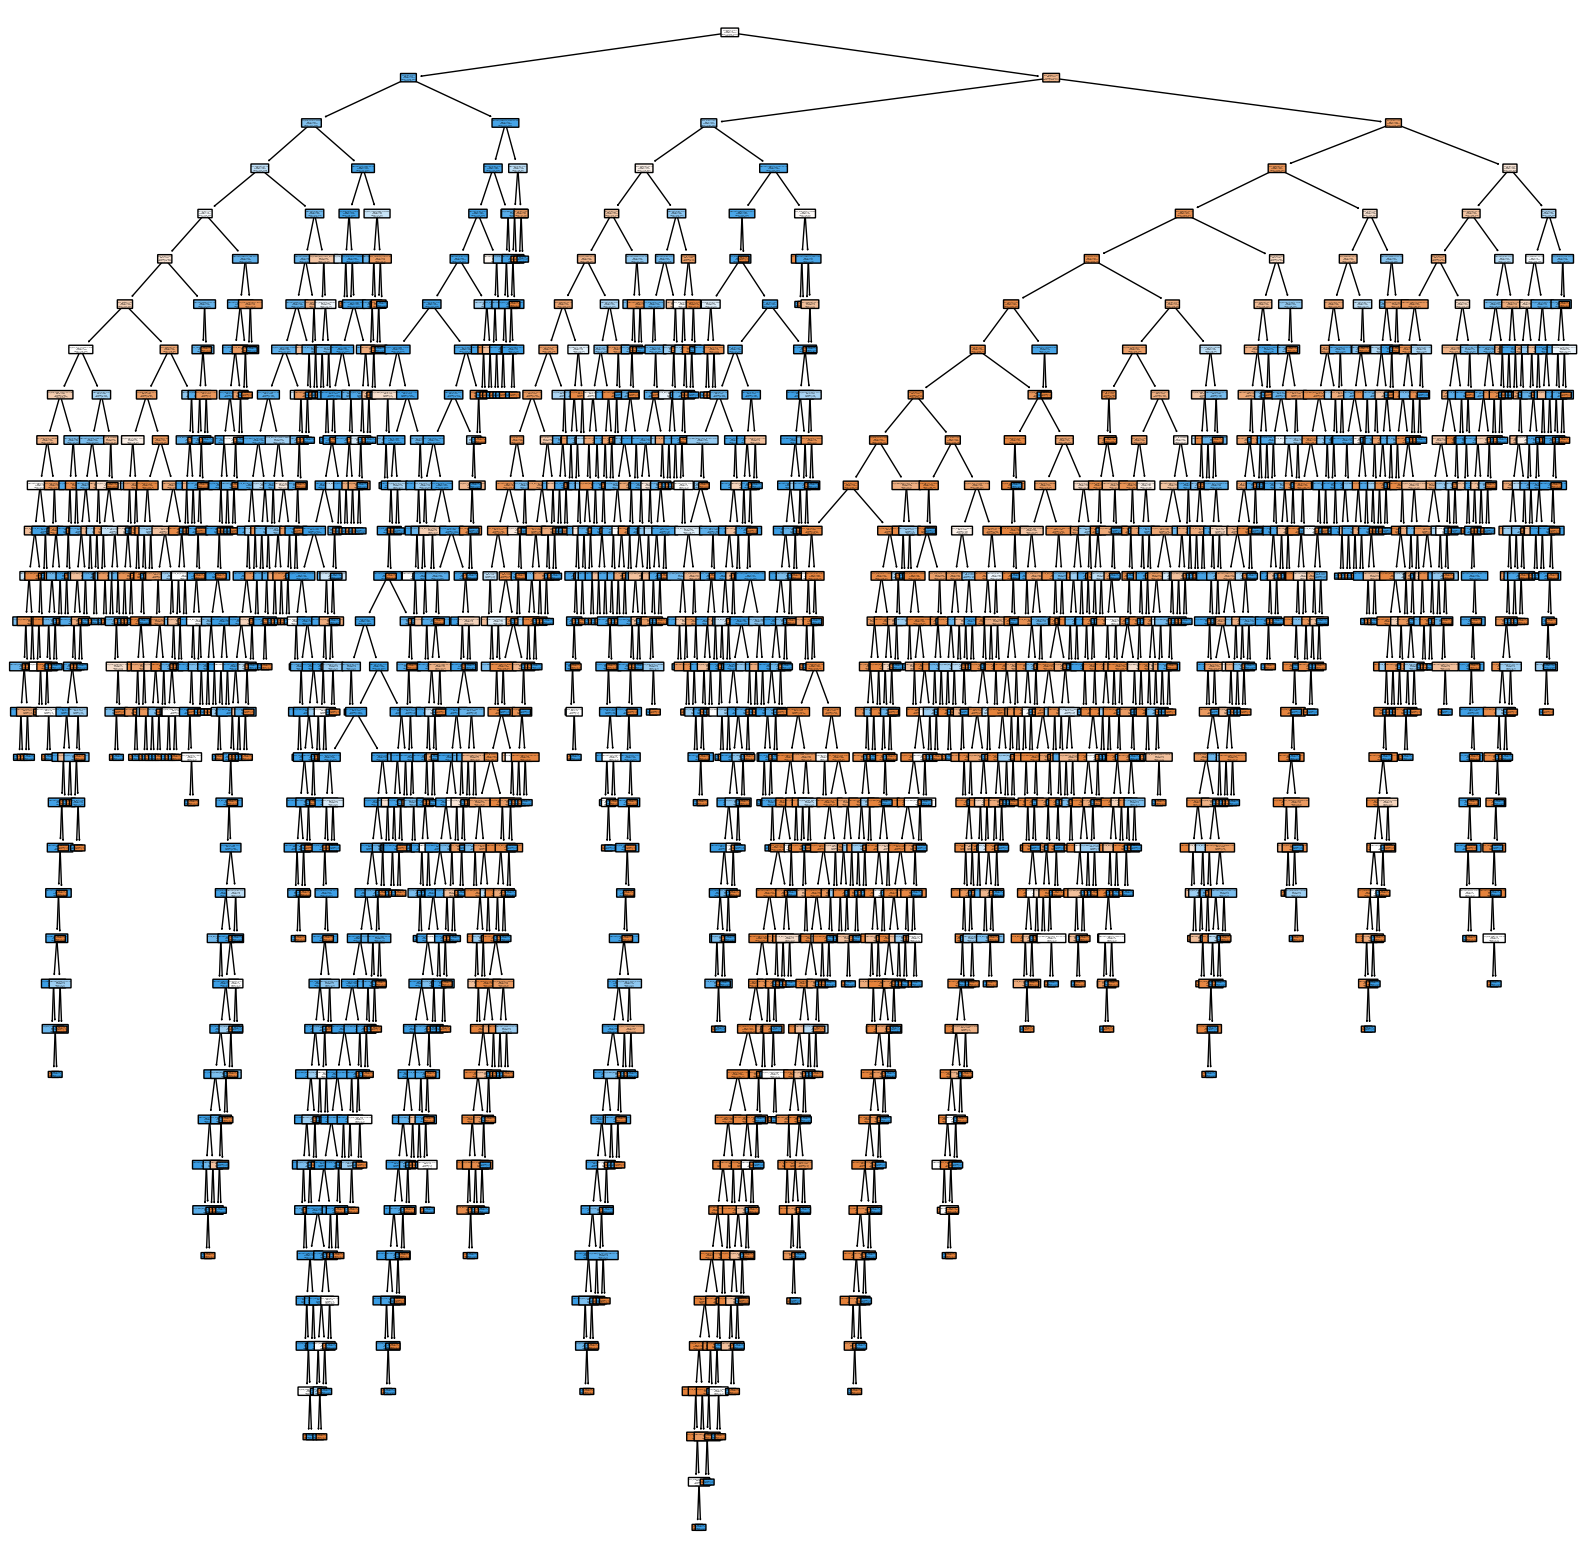

In [44]:
fig, ax = plt.subplots(figsize=(20, 20)) 
tree.plot_tree(dtc, 
               feature_names=X_test_reduced.columns, 
               class_names=['Loss', 'Win'], 
               filled=True,
               rounded=True,
               ax=ax)

plt.show()

## Attacker/defender
- unfortunatly some rows are unknown so this is a slightly smaller dataset (4k rows were unknown)

In [67]:
downsampled_df

,user_id,round_info_round_end,round_info_round_won,round_info_round_start,ally4_elims,ally4_deaths,ally4_assists,ally4_headshots,ally4_wallbangs,ally4_first_bloods,...,self_longest_gun_primary_spectre,self_longest_gun_primary_stinger,self_longest_gun_primary_vandal,self_longest_gun_secondary_classic,self_longest_gun_secondary_frenzy,self_longest_gun_secondary_ghost,self_longest_gun_secondary_none,self_longest_gun_secondary_sheriff,self_longest_gun_secondary_shorty,round_info_round_length
0,69,169029,0,127194,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,41835
1,65,1399018,1,1357408,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,41610
2,63,1647064,0,1611891,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,35173
3,71,1724602,1,1659100,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,65502
4,74,1502801,1,1471811,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,30990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27839,63,2226164,0,2128770,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,97394
27840,3804,1900614,1,1841602,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,59012
27841,69,410603,1,355602,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,55001
27842,997,711200,0,645601,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,65599


In [70]:
attack_df = downsampled_df[downsampled_df['round_info_ally_side_attacker'] == 1]
attack_df

,user_id,round_info_round_end,round_info_round_won,round_info_round_start,ally4_elims,ally4_deaths,ally4_assists,ally4_headshots,ally4_wallbangs,ally4_first_bloods,...,self_longest_gun_primary_spectre,self_longest_gun_primary_stinger,self_longest_gun_primary_vandal,self_longest_gun_secondary_classic,self_longest_gun_secondary_frenzy,self_longest_gun_secondary_ghost,self_longest_gun_secondary_none,self_longest_gun_secondary_sheriff,self_longest_gun_secondary_shorty,round_info_round_length
0,69,169029,0,127194,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,41835
2,63,1647064,0,1611891,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,35173
3,71,1724602,1,1659100,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,65502
5,3806,1559606,1,1495813,0.0,1.0,2.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,63793
11,57,144601,1,47599,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,97002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27829,3806,162003,0,111608,3.0,1.0,0.0,3.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,50395
27831,1012,1193195,0,1131000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,62195
27837,61,112403,1,47800,2.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,64603
27838,69,1047795,1,964446,1.0,1.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,83349


In [71]:
defend_df = downsampled_df[downsampled_df['round_info_ally_side_defender'] == 1]
defend_df

,user_id,round_info_round_end,round_info_round_won,round_info_round_start,ally4_elims,ally4_deaths,ally4_assists,ally4_headshots,ally4_wallbangs,ally4_first_bloods,...,self_longest_gun_primary_spectre,self_longest_gun_primary_stinger,self_longest_gun_primary_vandal,self_longest_gun_secondary_classic,self_longest_gun_secondary_frenzy,self_longest_gun_secondary_ghost,self_longest_gun_secondary_none,self_longest_gun_secondary_sheriff,self_longest_gun_secondary_shorty,round_info_round_length
1,65,1399018,1,1357408,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,41610
4,74,1502801,1,1471811,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,30990
6,1007,240024,0,206985,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,33039
7,80,2926742,0,2856128,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,70614
9,3806,532598,1,493914,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,38684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27833,1001,2128364,1,2084153,2.0,1.0,2.0,2.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,44211
27835,1016,641030,1,589591,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,51439
27836,58,1866667,0,1808809,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,57858
27839,63,2226164,0,2128770,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,97394


In [72]:
# train test split
X_attack = attack_df.drop('round_info_round_won', axis=1)
y_attack = attack_df['round_info_round_won']

X_attack_train, X_attack_test, y_attack_train, y_attack_test = train_test_split(X_attack, y_attack, test_size=0.2, random_state=1)

# Scale the data
scaler = StandardScaler()
X_attack_train_scaled = scaler.fit_transform(X_attack_train)
X_attack_test_scaled = scaler.transform(X_attack_test)

In [73]:
# Train the model using the training sets
dtc.fit(X_attack_train, y_attack_train)

# Predict the response for test dataset
y_attack_pred = dtc.predict(X_attack_test)


y_attack_pred_train = dtc.predict(X_attack_train)

# Model Accuracy
print("Train Accuracy:", accuracy_score(y_attack_train, y_attack_pred_train))

# Confusion Matrix
print(confusion_matrix(y_attack_train, y_attack_pred_train))

# Classification Report
print(classification_report(y_attack_test, y_attack_pred))

# Model Accuracy
print("Test Accuracy:", accuracy_score(y_attack_test, y_attack_pred))

# Confusion Matrix
print(confusion_matrix(y_attack_test, y_attack_pred))

# Classification Report
print(classification_report(y_attack_test, y_attack_pred))

Train Accuracy: 1.0
[[4610    0]
 [   0 4583]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1196
           1       0.94      0.94      0.94      1103

    accuracy                           0.94      2299
   macro avg       0.94      0.94      0.94      2299
weighted avg       0.94      0.94      0.94      2299

Test Accuracy: 0.9421487603305785
[[1126   70]
 [  63 1040]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1196
           1       0.94      0.94      0.94      1103

    accuracy                           0.94      2299
   macro avg       0.94      0.94      0.94      2299
weighted avg       0.94      0.94      0.94      2299



In [74]:
feature_importances = pd.DataFrame(dtc.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

In [76]:
feature_importances[:50]

,importance
self_deaths,0.297159
ally1_deaths,0.126002
ally2_deaths,0.052805
self_avg_health,0.050790
opponent1_deaths,0.044883
ally4_deaths,0.037215
spike_planted,0.031853
ally2_elims,0.031458
opponent3_deaths,0.029990
ally4_elims,0.029619


In [77]:
threshold = 0.01

unimportant_features = feature_importances[feature_importances['importance'] < threshold].index

In [78]:
unimportant_features

Index(['ally1_avg_health', 'ally3_ultimate_usage', 'user_id',
       'ally2_headshots', 'ally3_elims', 'round_info_round_end',
       'self_avg_ammo_reserve', 'self_movement_metric', 'self_first_bloods',
       'self_avg_credits',
       ...
       'ally3_character_reyna', 'ally3_character_sage',
       'ally4_character_astra', 'map_unknown', 'ally3_character_viper',
       'ally3_character_yoru', 'opponent5_character_astra',
       'opponent5_character_brimstone', 'opponent5_character_chamber',
       'ally2_character_cypher'],
      dtype='object', length=323)

In [79]:
X_attack_train_reduced = X_attack_train.drop(unimportant_features, axis=1)
X_attack_test_reduced = X_attack_test.drop(unimportant_features, axis=1)

In [80]:
# Train the model using the training sets
dtc.fit(X_attack_train_reduced, y_attack_train)

# Predict the response for test dataset
y_attack_pred = dtc.predict(X_attack_test_reduced)


y_attack_pred_train = dtc.predict(X_attack_train_reduced)

# Model Accuracy
print("Train Accuracy:", accuracy_score(y_attack_train, y_attack_pred_train))

# Confusion Matrix
print(confusion_matrix(y_attack_train, y_attack_pred_train))

# Classification Report
print(classification_report(y_attack_test, y_attack_pred))

# Model Accuracy
print("Test Accuracy:", accuracy_score(y_attack_test, y_attack_pred))

# Confusion Matrix
print(confusion_matrix(y_attack_test, y_attack_pred))

# Classification Report
print(classification_report(y_attack_test, y_attack_pred))

Train Accuracy: 1.0
[[4610    0]
 [   0 4583]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1196
           1       0.95      0.95      0.95      1103

    accuracy                           0.95      2299
   macro avg       0.95      0.95      0.95      2299
weighted avg       0.95      0.95      0.95      2299

Test Accuracy: 0.9491083079599826
[[1136   60]
 [  57 1046]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1196
           1       0.95      0.95      0.95      1103

    accuracy                           0.95      2299
   macro avg       0.95      0.95      0.95      2299
weighted avg       0.95      0.95      0.95      2299



In [82]:
feature_importances = pd.DataFrame(dtc.feature_importances_,
                                   index = X_attack_train_reduced.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
self_deaths,0.297981
ally1_deaths,0.128197
self_avg_health,0.072957
ally2_deaths,0.062492
opponent1_deaths,0.057163
round_info_round_length,0.056158
ally4_deaths,0.041886
ally2_elims,0.040410
spike_planted,0.038524
opponent3_deaths,0.037859


In [83]:
# train test split
X_defend = defend_df.drop('round_info_round_won', axis=1)
y_defend = defend_df['round_info_round_won']

X_defend_train, X_defend_test, y_defend_train, y_defend_test = train_test_split(X_defend, y_defend, test_size=0.2, random_state=1)

# Scale the data
scaler = StandardScaler()
X_defend_train_scaled = scaler.fit_transform(X_train)
X_defend_test_scaled = scaler.transform(X_test)

In [84]:
# Train the model using the training sets
dtc.fit(X_defend_train, y_defend_train)

# Predict the response for test dataset
y_defend_pred = dtc.predict(X_defend_test)


y_defend_pred_train = dtc.predict(X_defend_train)

# Model Accuracy
print("Train Accuracy:", accuracy_score(y_defend_train, y_defend_pred_train))

# Confusion Matrix
print(confusion_matrix(y_defend_train, y_defend_pred_train))

# Classification Report
print(classification_report(y_defend_test, y_defend_pred))

# Model Accuracy
print("Test Accuracy:", accuracy_score(y_defend_test, y_defend_pred))

# Confusion Matrix
print(confusion_matrix(y_defend_test, y_defend_pred))

# Classification Report
print(classification_report(y_defend_test, y_defend_pred))

Train Accuracy: 1.0
[[4643    0]
 [   0 4608]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1158
           1       0.94      0.93      0.94      1155

    accuracy                           0.94      2313
   macro avg       0.94      0.94      0.94      2313
weighted avg       0.94      0.94      0.94      2313

Test Accuracy: 0.9386078685689581
[[1095   63]
 [  79 1076]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1158
           1       0.94      0.93      0.94      1155

    accuracy                           0.94      2313
   macro avg       0.94      0.94      0.94      2313
weighted avg       0.94      0.94      0.94      2313



In [85]:
feature_importances = pd.DataFrame(dtc.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

In [86]:
feature_importances[:50]

,importance
self_avg_health,0.299398
ally4_deaths,0.149237
ally1_deaths,0.084401
opponent0_deaths,0.060168
opponent4_deaths,0.041811
ally2_deaths,0.032105
opponent2_deaths,0.025413
opponent3_deaths,0.024067
ally3_elims,0.023506
ally3_deaths,0.023080


In [87]:
threshold = 0.01

unimportant_features = feature_importances[feature_importances['importance'] < threshold].index

In [88]:
unimportant_features

Index(['self_prec_map_covered', 'spike_planted', 'ally3_avg_health',
       'round_info_round_length', 'self_avg_ammo_reserve', 'ally2_elims',
       'ally4_avg_health', 'self_total_firing_time', 'ally2_avg_health',
       'user_id',
       ...
       'ally2_character_fade', 'ally2_character_gekko',
       'ally2_character_harbor', 'ally2_character_jett',
       'ally2_character_kay/o', 'ally2_character_killjoy',
       'ally2_character_omen', 'ally2_character_phoenix',
       'ally2_character_raze', 'ally2_character_cypher'],
      dtype='object', length=327)

In [89]:
X_defend_train_reduced = X_defend_train.drop(unimportant_features, axis=1)
X_defend_test_reduced = X_defend_test.drop(unimportant_features, axis=1)

In [90]:
# Train the model using the training sets
dtc.fit(X_defend_train_reduced, y_defend_train)

# Predict the response for test dataset
y_defend_pred = dtc.predict(X_defend_test_reduced)


y_defend_pred_train = dtc.predict(X_defend_train_reduced)

# Model Accuracy
print("Train Accuracy:", accuracy_score(y_defend_train, y_defend_pred_train))

# Confusion Matrix
print(confusion_matrix(y_defend_train, y_defend_pred_train))

# Classification Report
print(classification_report(y_defend_test, y_defend_pred))

# Model Accuracy
print("Test Accuracy:", accuracy_score(y_defend_test, y_defend_pred))

# Confusion Matrix
print(confusion_matrix(y_defend_test, y_defend_pred))

# Classification Report
print(classification_report(y_defend_test, y_defend_pred))

Train Accuracy: 0.9910279969733001
[[4623   20]
 [  63 4545]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1158
           1       0.95      0.94      0.94      1155

    accuracy                           0.94      2313
   macro avg       0.94      0.94      0.94      2313
weighted avg       0.94      0.94      0.94      2313

Test Accuracy: 0.9429312581063554
[[1098   60]
 [  72 1083]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1158
           1       0.95      0.94      0.94      1155

    accuracy                           0.94      2313
   macro avg       0.94      0.94      0.94      2313
weighted avg       0.94      0.94      0.94      2313



In [93]:
feature_importances = pd.DataFrame(dtc.feature_importances_,
                                   index = X_defend_train_reduced.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
self_avg_health,0.360931
ally4_deaths,0.160256
ally1_deaths,0.093785
opponent0_deaths,0.070062
opponent4_deaths,0.053211
opponent2_deaths,0.041622
ally2_deaths,0.041576
opponent3_deaths,0.038462
ally3_elims,0.038137
opponent1_deaths,0.037896


In [96]:
df1 = pd.read_csv('balanced_onehot.csv')

In [97]:
df1

,user_id,round_info_round_end,round_info_round_won,round_info_round_start,ally4_elims,ally4_deaths,ally4_assists,ally4_headshots,ally4_wallbangs,ally4_first_bloods,...,self_longest_gun_primary_spectre,self_longest_gun_primary_stinger,self_longest_gun_primary_vandal,self_longest_gun_secondary_classic,self_longest_gun_secondary_frenzy,self_longest_gun_secondary_ghost,self_longest_gun_secondary_none,self_longest_gun_secondary_sheriff,self_longest_gun_secondary_shorty,round_info_round_length
0,69,169029,0,127194,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,41835
1,65,1399018,1,1357408,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,41610
2,63,1647064,0,1611891,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,35173
3,71,1724602,1,1659100,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,65502
4,74,1502801,1,1471811,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,30990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27839,63,2226164,0,2128770,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,97394
27840,3804,1900614,1,1841602,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,59012
27841,69,410603,1,355602,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,55001
27842,997,711200,0,645601,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,65599
